In [8]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

In [108]:
def binomial_coeff(n, k):
    # Compute the binomial coefficient as n!/(k!*(n-k)!):
    return factorial(n)/(factorial(k)*(factorial(n-k)))

def bernstein_poly(u, n):
    # Define the coeficients of the polynomial of degree n
    coeff = list(map(binomial_coeff, [n]*(n+1), range(n+1)))
    u_1 = np.array(list(map(lambda x,y: x**y, [u]*(n+1), range(n+1))))
    u_2 = np.array(list(map(lambda x,y: x**y, [1.-u]*(n+1), range(n, -1, -1))))
    return coeff * u_1 * u_2

def bezier_inter(u, control_points):
    n = control_points.shape[0]-1
    b_coeffs = bernstein_poly(u, n)
    return np.sum(control_points * b_coeffs[...,np.newaxis], 0)


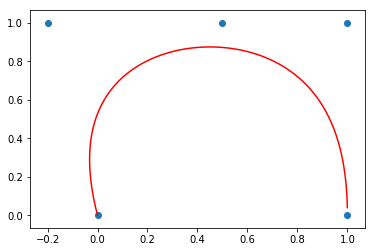

In [124]:
control_points = np.array([[0.0, 0.0], [-0.2, 1.0], [0.5,1.0], [1.0, 1.0], [1.0,0.0]])
inter_points = np.array([bezier_inter(u, control_points) for u in np.arange(0., 1., 0.01)])

plt.scatter(control_points[:,0], control_points[:,1])
plt.plot(inter_points[:,0], inter_points[:,1], 'r-')
plt.show()